<font size=7> Early social distancing: evidence of privilege in a pandemic from smartphone data </font><br>
Nabarun Dasgupta, MPH, PhD | nab@unc.edu | @nabarund<br>
*Dr. Dasgupta is an epidemiologist at the University of North Carolina in Chapel Hill. He studies population level patterns of infectious disease, medication safety, and opioids.*<br>
Thanks to Ben White for data munging help. Code available on [GitHub](https://github.com/opioiddatalab/covid).

In [19]:
display "Notebook generated on $S_DATE at $S_TIME ET"

Notebook generated on 15 Apr 2020 at 16:20:53 ET


On March 23, 2020 Stuart Thompson and Yaryna Serkez of *The New York Times* [published](https://www.nytimes.com/interactive/2020/03/23/opinion/coronavirus-economy-recession.html) a fascinating use of cell phone GPS signal information to gauge movement and commuting, during the advent of social distancing. They compared the state-level data in a [slick graphic](https://www.nytimes.com/interactive/2020/03/23/opinion/coronavirus-economy-recession.html) to political leanings. But we wanted to understand more about other community level characteristics of slow versus fast adopters.<br>
<br>
We were provided access to the same location dataset on social distancing published today in the. We used a data merging approach we have [previously published](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6339867/). Repurposing code from an ongoing project, we merged in community-level data from the Robert Wood Johnson Foundation's [County Health Rankings](https://www.countyhealthrankings.org/). This very rich dataset contains dozens of explanatory variables about health, social, and economic indicators.<br>


In [20]:
// Load procesed and merged data
clear all
set scheme economist
use "https://github.com/opioiddatalab/covid/blob/master/analysiset.dta?raw=true"
distinct fips
tab rucc






       |        Observations
       |      total   distinct
-------+----------------------
  fips |       2121       2121


  RUCC_2013 |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |        341       16.08       16.08
          2 |        302       14.24       30.32
          3 |        280       13.20       43.52
          4 |        171        8.06       51.58
          5 |         80        3.77       55.35
          6 |        441       20.79       76.14
          7 |        319       15.04       91.18
          8 |         96        4.53       95.71
          9 |         91        4.29      100.00
------------+-----------------------------------
      Total |      2,121      100.00


---
# Primary Care Providers

We wanted to see if places with more social distancing had better healthcare resources. So we looked at primary care providers per 100,000 population. 





----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(pcp_rate)  mean(pcp_rate)   sem(pcp_rate)
----------+-----------------------------------------------
        1 |            394       50.673288        1.475644
        2 |            409       48.546454        1.292011
        3 |            424       53.749911        1.509134
        4 |            417       57.357213        1.489985
        5 |            429       69.975209        2.059602
----------------------------------------------------------


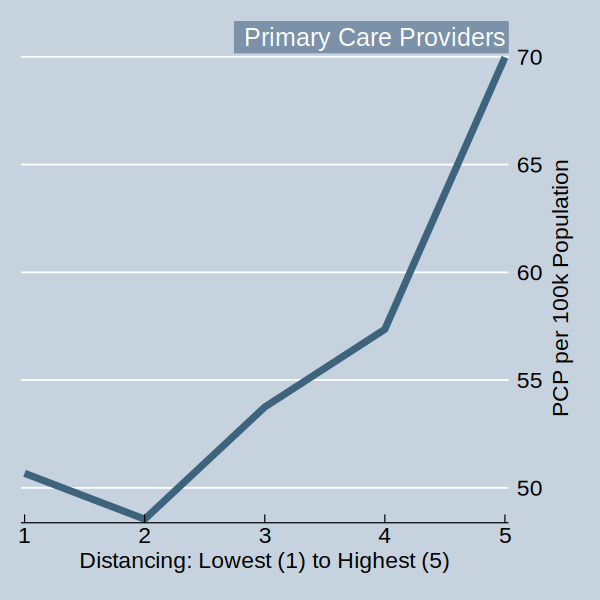

In [21]:
// Comparing Primary Care Physicians per 100,000 population to social distancing
frame change default
foreach var of varlist pcp_rate {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (mean) `var', by(iso5)
                    la var `var' "PCP per 100k Population"
                        line `var' iso5 , note("Primary Care Providers") 
}

---

# Mental Health Providers

For people sequestered at home, mental health providers may play an emerging role. These data are from CMS National Provider Identification (NPI) via [RWJF](https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/2020-measures). It is expressed in rates per 100,000 population.

In [22]:
// Basic descriptive on commuting alone
frame change default
summ mhproviders_rate, d




       Mental Health Providers per 100,000 population
-------------------------------------------------------------
      Percentiles      Smallest
 1%      7.85916              0
 5%     13.88375          4.153
10%     22.67574         4.2155       Obs               2,065
25%     48.69076        4.41326       Sum of Wgt.       2,065

50%     116.2791                      Mean           160.3365
                        Largest       Std. Dev.      164.3297
75%     214.4129       1355.829
90%     345.1704       1419.854       Variance       27004.25
95%     462.7516        1420.66       Skewness        2.72275
99%      799.601       1557.914       Kurtosis       15.14359




----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(mhprov~e)  mean(mhprov~e)   sem(mhprov~e)
----------+-----------------------------------------------
        1 |            385       151.94966        8.470459
        2 |            411       138.29242        7.864046
        3 |            428       141.19138         7.76445
        4 |            413       153.25776         7.27073
        5 |            428       215.02519        8.437608
----------------------------------------------------------


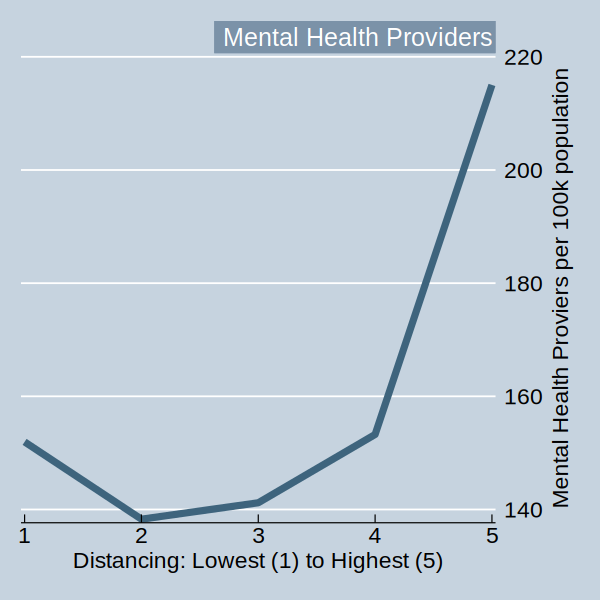

In [23]:
// Comparing mental health provider rate to social distancing
foreach var of varlist mhproviders_rate {
    frame change default
        table iso5, c(count `var' mean `var' sem `var')
            frame put `var' iso5, into(`var')
                frame change `var'
                    collapse (mean) `var', by(iso5)
                        la var mhproviders_rate "Mental Health Proviers per 100k population"
                            line `var' iso5, note("Mental Health Providers")           
}

---
# Health Insurance

Getting hospitalized for Covid-19 is sure to be expensive. After hearing that even some front line nurses in pulmonary infectious disease units in North Carolina do not have health insurance, we wanted to see if there was any association between health insurance status and social distancing. 




----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(uninsu~p)  mean(uninsu~p)   sem(uninsu~p)
----------+-----------------------------------------------
        1 |            411       12.953806        .2351323
        2 |            419       12.281451        .2263736
        3 |            436       11.216858        .2392373
        4 |            422       10.373401        .2278884
        5 |            433       8.4981123        .1955759
----------------------------------------------------------


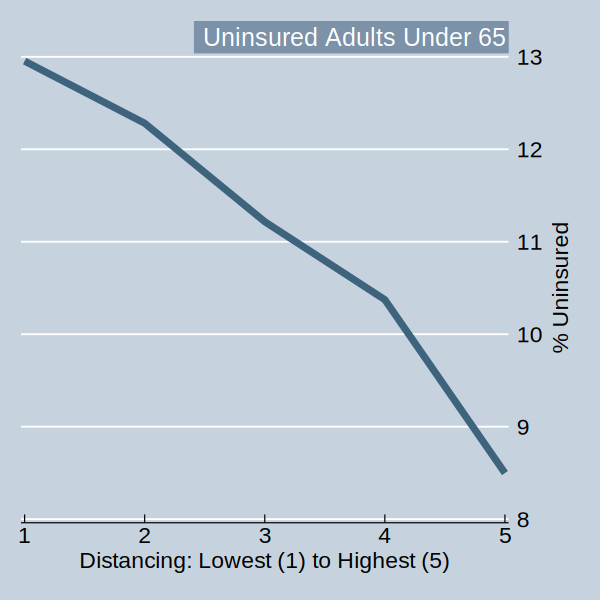

In [24]:
// Comparing percent uninsured to social distancing
frame change default
foreach var of varlist uninsured_p {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (mean) `var', by(iso5)
                    la var `var' "% Uninsured"
                        line `var' iso5 , note("Uninsured Adults Under 65") 
}

Alarmingly, counties with lower social distancing also had more uninsured residents!

---
# Flu Vaccination

We had a hypothesis that counties that were more involved in preventative behaviors would be more likely to self-isolate more thoroughly. To test this, we examined whether earlier flu vaccination rates impacted how much the county was likely to slow down in the current coronavirus outbreak. This is quantified as the percent of annual Medicare enrollees having an annual flu vaccination, as reported by the Robert Wood Johnson Foundation. Since the flu vaccine is free to all Medicare beneficiaries, and this is the elderly age group with the most influenza mortality, this is a convenient metric to test *a priori* how conscientious the population was, on average.




        % Medicare Beneficiaries Getting Flu Vaccine
-------------------------------------------------------------
      Percentiles      Smallest
 1%           18              9
 5%           26              9
10%           30             12       Obs               2,118
25%           37             12       Sum of Wgt.       2,118

50%           43                      Mean           41.94145
                        Largest       Std. Dev.      8.642338
75%           48             62
90%           52             62       Variance          74.69
95%           54             63       Skewness      -.6060023
99%           57             65       Kurtosis        3.25627

(bin=10, start=9, width=5.6)


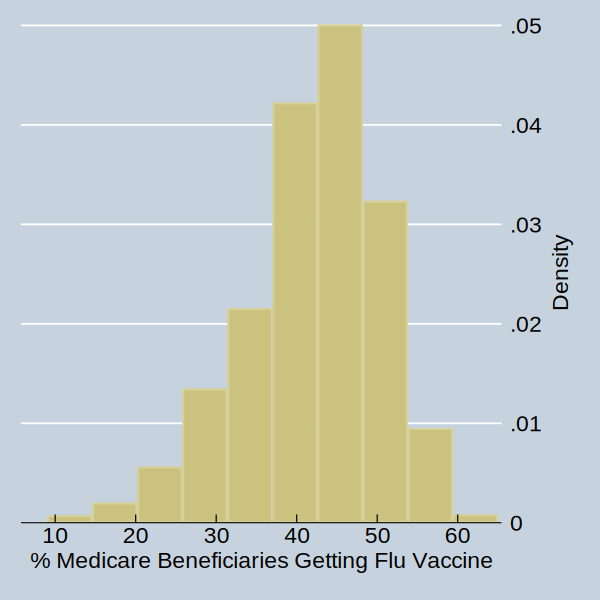

In [25]:
// Basic descriptive on background influenza vaccine
frame change default
summ fluvaccine, d
hist fluvaccine, bin(10)



----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(fluvac~e)  mean(fluvac~e)   sem(fluvac~e)
----------+-----------------------------------------------
        1 |            409       40.657703        .4197706
        2 |            419       40.933174        .4207001
        3 |            436       42.261467        .4123233
        4 |            422       42.037914        .4287657
        5 |            432       43.717594        .4034016
----------------------------------------------------------


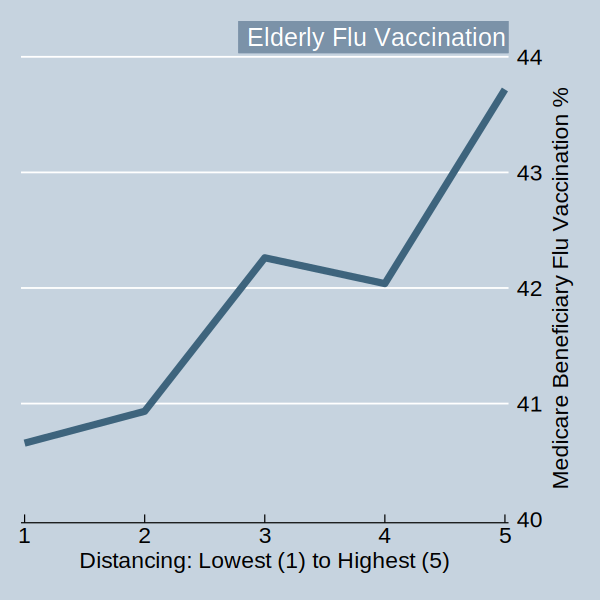

In [26]:
// Comparing background flu vaccination with current social distancing
table iso5, c(count fluvaccine mean fluvaccine sem fluvaccine)

frame put fluvaccine iso5, into(flu)
    frame change flu
        collapse (mean) fluvaccine, by(iso5)
            la var fluvaccine "Medicare Beneficiary Flu Vaccination %"
                line fluvaccine iso5, note("Elderly Flu Vaccination")

--- 
# Income

There is a trend emerging. So, since the places with more social distancing seem to have more health resources, perhaps there are trends in financial means? Income data are from the American Community Survey 5-year estimates via [RWJF](https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/2020-measures).




----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(income80)  mean(income80)   sem(income80)
----------+-----------------------------------------------
        1 |            411        87722.53         719.879
        2 |            419       89174.212         739.724
        3 |            436       95383.966        943.0726
        4 |            422       98712.524        1085.498
        5 |            433       110924.52        1508.812
----------------------------------------------------------


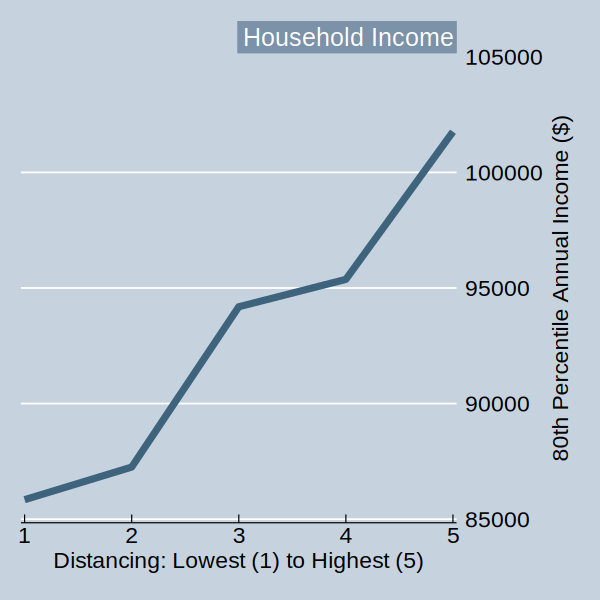

In [27]:
// Comparing income inequality to social distancing
frame change default
foreach var of varlist income80 {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (median) `var', by(iso5)
                    la var `var' "80th Percentile Annual Income ($)"
                        line `var' iso5, note("Household Income")          
}

---
# Income Inequality

So places with more social distancing tend to be wealthier. What about income inequality? Is this merely a matter of have and have-nots? Or does the overall structure of society tell us something. There are many compelling ways to measure income inequality. We are using the ratio of the 80th percentile of income to the 20th percentile. Loosely interpreted, the closer to 4.0, the less inequality there is. Income data are from the American Community Survey 5-year estimates via [RWJF](https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/2020-measures).




----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(income~o)  mean(income~o)   sem(income~o)
----------+-----------------------------------------------
        1 |            411       4.7255478        .0398339
        2 |            419       4.6624253        .0342156
        3 |            436       4.4865377        .0330155
        4 |            422       4.4953328        .0341896
        5 |            433       4.4615139        .0346775
----------------------------------------------------------


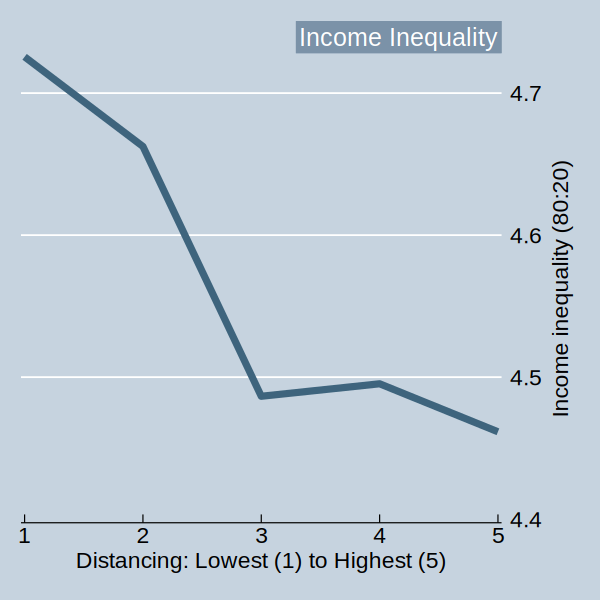

In [28]:
// Comparing income inequality to social distancing
frame change default
foreach var of varlist incomeratio {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (mean) `var', by(iso5)
                    la var `var' "Income inequality (80:20)"
                        line `var' iso5, note("Income Inequality")     
}


---
*fin.*




----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(drivea~p)  mean(drivea~p)   sem(drivea~p)
----------+-----------------------------------------------
        1 |            411       81.477141         .288976
        2 |            419       82.040113        .2185734
        3 |            436       81.579801        .2054981
        4 |            422        80.26258        .2841059
        5 |            433       77.406371        .4115545
----------------------------------------------------------


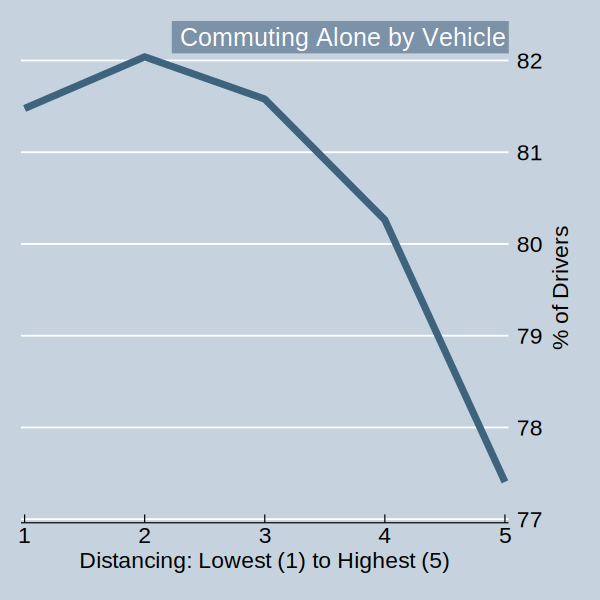

In [29]:
frame change default
foreach var of varlist drivealone_p {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (mean) `var', by(iso5)
                    la var `var' "% of Drivers"
                        line `var' iso5, note("Commuting Alone by Vehicle")     
}

---





----------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(rucc)  mean(rucc)   sem(rucc)
----------+-----------------------------------
        1 |        411   5.3649635    .1087599
        2 |        419   4.7040572    .1113948
        3 |        436   4.3761468    .1137103
        4 |        422   4.0379148    .1196491
        5 |        433   3.5727482    .1224771
----------------------------------------------


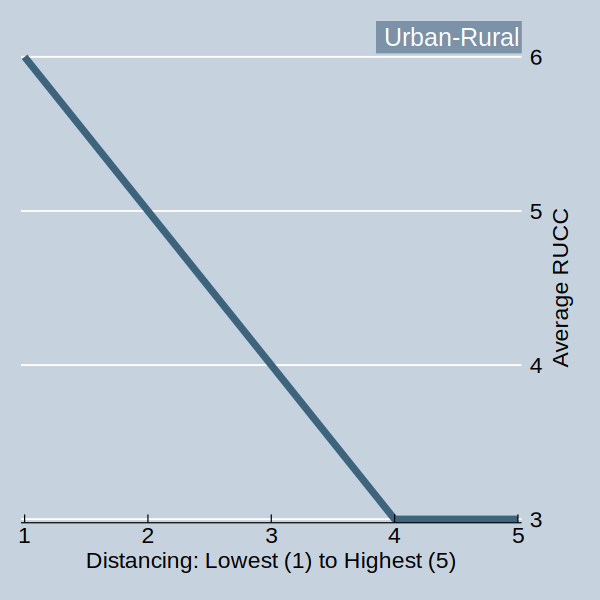

In [30]:
frame change default
foreach var of varlist rucc {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (median) `var', by(iso5)
                    la var `var' "Average RUCC"
                        line `var' iso5, note("Urban-Rural")     
}




----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(longco~p)  mean(longco~p)   sem(longco~p)
----------+-----------------------------------------------
        1 |            411       27.034793        .6283309
        2 |            419       30.952267        .5940695
        3 |            436       32.230963        .5798799
        4 |            422       32.639573        .5705296
        5 |            433       33.721016        .5567337
----------------------------------------------------------


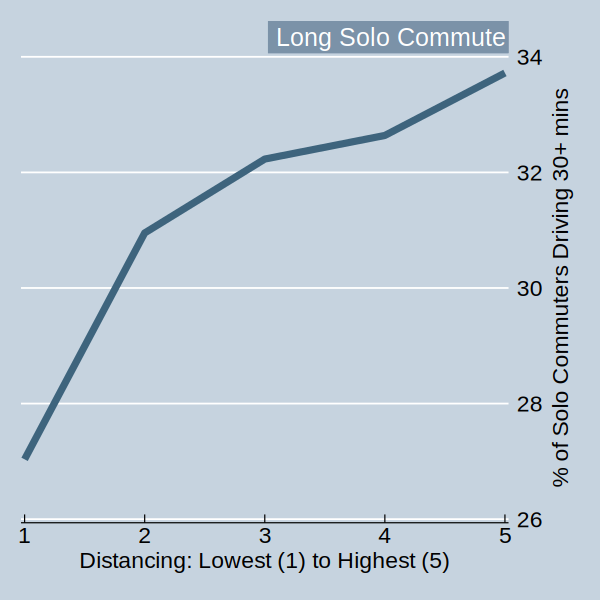

In [31]:
frame change default
foreach var of varlist longcommute_p {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (mean) `var', by(iso5)
                    la var `var' "% of Solo Commuters Driving 30+ mins"
                        line `var' iso5, note("Long Solo Commute")     
}